# Chapter 03 homework
## Set up
Let's import modules will be used later

In [19]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import KFold validator
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Get MNIST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Let's check the first value in this data set

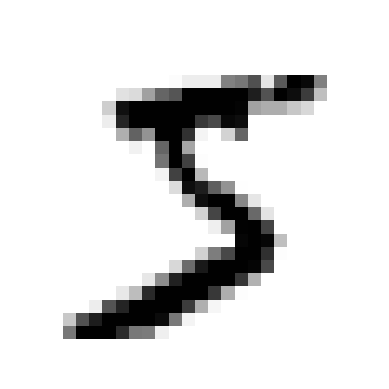

In [3]:
X = mnist["data"]
X.shape
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()


Check the label of this value

In [4]:
y = mnist["target"]
y[0]

'5'

Most of machine learning algorithm expect number instead of character, let's convert `labels` to integer number

In [5]:
y = y.astype(np.uint8)

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


Use K-folds cross validation to verify this classifier

In [9]:
skfolds = StratifiedKFold(n_splits=3, shuffle=True,random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]

    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Accuracy is not the first metric for classifier, especialy we process some biased dataset。 The better method is using confusion matrix

In [10]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

Let's caculate the precision and recall

In [12]:
precision = precision_score(y_train_5, y_train_pred)
print("Precision: ", precision)
recall = recall_score(y_train_5, y_train_pred)
print("Recall", recall)

Precision:  0.8370879772350012
Recall 0.6511713705958311


In [13]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

Use `decision_function()` to return the score for specific instance

In [17]:
y_socres = sgd_clf.decision_function([some_digit])
print(y_socres)
threshold = 0
y_some_digit_pred = (y_socres > threshold)
print(y_some_digit_pred)

[2164.22030239]
[ True]


Let's get all instance score

In [18]:
y_socres = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

Use `precision_recall_curve()` to caculate the precision and recall rate for all possible thershold 

In [20]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_socres)

Use `Matplotlib` to draw gragh

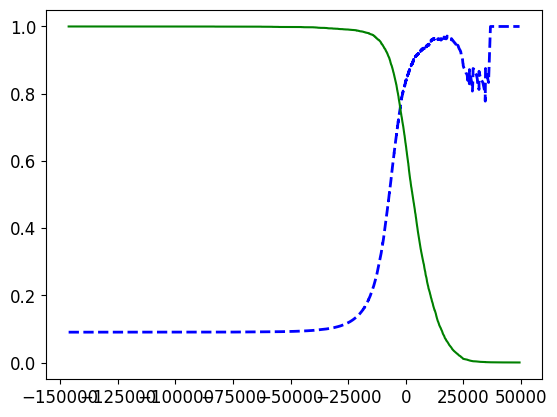

In [21]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...]

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()